# 데이터 구조의 이해 - (5) 딥러닝 텐서

#### 작성자 - 고우주 | kubwa 쿱와

## 벡터, 행렬
- 2D Tensor(Typical Simple Setting)

|t| = (Batch size, dim)

- 3D Tensor(Typical Computer Vision) - 비전 분야에서의 3차원 텐서

|t| = (batch size, width, height)

- 3D Tensor(Typical Natural Language Processing) - NLP 분야에서의 3차원 텐서

|t| = (batch size, length, dim)

### Install TensorFlow

In [ ]:
# install tensorflow
#!pip install tensorflow==2.3.0

### Import TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow as tf
import numpy as np

import IPython.display as display

### 1- 1D Tensor

In [3]:
a = np.ones(5)
a = tf.multiply(a, 1)
print(a)
print(a.shape)

tf.Tensor([1. 1. 1. 1. 1.], shape=(5,), dtype=float64)
(5,)


### 2- 2D Tensor

In [4]:
b = np.ones([2, 5])
b = tf.multiply(b, 1)
print(b)
print(b.shape)

tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(2, 5), dtype=float64)
(2, 5)


### 3D- Tensor

In [5]:
file_path = tf.keras.utils.get_file('cat.jpg', 
                                 'https://www.petmd.com/sites/default/files/what-does-it-mean-when-cat-wags-tail.jpg')

In [6]:
img_raw = tf.io.read_file(file_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x...


In [7]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(241, 320, 3)
<dtype: 'uint8'>


In [8]:
img_tensor

<tf.Tensor: shape=(241, 320, 3), dtype=uint8, numpy=
array([[[222, 221, 201],
        [222, 221, 201],
        [222, 221, 201],
        ...,
        [215, 212, 193],
        [215, 212, 193],
        [215, 212, 193]],

       [[222, 221, 201],
        [222, 221, 201],
        [222, 221, 201],
        ...,
        [215, 212, 193],
        [215, 212, 193],
        [215, 212, 193]],

       [[222, 221, 203],
        [222, 221, 203],
        [223, 222, 204],
        ...,
        [215, 212, 193],
        [216, 213, 194],
        [216, 213, 194]],

       ...,

       [[137,  95,  37],
        [138,  96,  38],
        [143, 100,  45],
        ...,
        [197, 192, 170],
        [195, 190, 168],
        [193, 188, 166]],

       [[146, 101,  44],
        [133,  91,  33],
        [135,  92,  37],
        ...,
        [199, 194, 172],
        [199, 194, 172],
        [198, 193, 171]],

       [[147, 100,  46],
        [143,  98,  43],
        [142,  96,  44],
        ...,
        [199, 193, 17

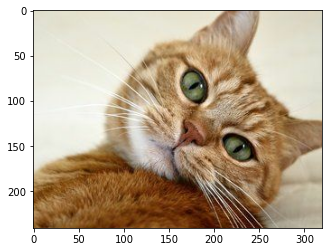

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor)

In [10]:
img_final = tf.image.resize(img_tensor, [192, 192])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(192, 192, 3)
0.0
0.99515915


In [11]:
img_final

<tf.Tensor: shape=(192, 192, 3), dtype=float32, numpy=
array([[[0.87058824, 0.8666667 , 0.7882353 ],
        [0.87058824, 0.8666667 , 0.7882353 ],
        [0.8745098 , 0.87058824, 0.7921569 ],
        ...,
        [0.8483662 , 0.83137256, 0.75424826],
        [0.84313726, 0.83137256, 0.75686276],
        [0.84313726, 0.83137256, 0.75686276]],

       [[0.87058824, 0.8666667 , 0.7912378 ],
        [0.87208945, 0.8681679 , 0.792739  ],
        [0.8745098 , 0.87058824, 0.79515934],
        ...,
        [0.84636444, 0.83137256, 0.75524914],
        [0.84313726, 0.83137256, 0.75686276],
        [0.84463847, 0.83287376, 0.75836396]],

       [[0.87309027, 0.8691687 , 0.79858047],
        [0.8745098 , 0.87058824, 0.8       ],
        [0.8745098 , 0.87058824, 0.8       ],
        ...,
        [0.84313726, 0.83137256, 0.75686276],
        [0.8456393 , 0.8338746 , 0.7593648 ],
        [0.84705883, 0.8352941 , 0.7607843 ]],

       ...,

       [[0.54023015, 0.37552422, 0.14807326],
        [0.57

### 4- Slicing

In [12]:
print(img_final[:, :3])

tf.Tensor(
[[[0.87058824 0.8666667  0.7882353 ]
  [0.87058824 0.8666667  0.7882353 ]
  [0.8745098  0.87058824 0.7921569 ]]

 [[0.87058824 0.8666667  0.7912378 ]
  [0.87208945 0.8681679  0.792739  ]
  [0.8745098  0.87058824 0.79515934]]

 [[0.87309027 0.8691687  0.79858047]
  [0.8745098  0.87058824 0.8       ]
  [0.8745098  0.87058824 0.8       ]]

 ...

 [[0.54023015 0.37552422 0.14807326]
  [0.5757964  0.40716898 0.19148272]
  [0.53287756 0.36614278 0.15996765]]

 [[0.5490503  0.37950367 0.15366626]
  [0.5414216  0.37279412 0.15710784]
  [0.5986724  0.43527368 0.22904412]]

 [[0.5692404  0.38870856 0.17413554]
  [0.55336016 0.3744691  0.16904645]
  [0.55638546 0.3929868  0.18775803]]], shape=(192, 3, 3), dtype=float32)


### 5- Reshape

In [13]:
tf.reshape(img_final, [-1])

<tf.Tensor: shape=(110592,), dtype=float32, numpy=
array([0.87058824, 0.8666667 , 0.7882353 , ..., 0.7720759 , 0.74904686,
       0.6627723 ], dtype=float32)>

In [14]:
print(tf.reshape(b, [2, 5, 1]).shape)

(2, 5, 1)
